In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [96]:
df=pd.read_excel('EDA_Cars.xlsx')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDEX           303 non-null    int64  
 1   INCOME          260 non-null    float64
 2   MARITAL STATUS  275 non-null    object 
 3   SEX             297 non-null    object 
 4   EDUCATION       259 non-null    object 
 5   JOB             257 non-null    object 
 6   TRAVEL TIME     262 non-null    float64
 7   USE             250 non-null    object 
 8   MILES CLOCKED   278 non-null    float64
 9   CAR TYPE        293 non-null    object 
 10  CAR AGE         283 non-null    float64
 11  CITY            297 non-null    object 
 12  POSTAL CODE     300 non-null    float64
dtypes: float64(5), int64(1), object(7)
memory usage: 30.9+ KB


In [98]:
# 
df.isnull().sum()

INDEX              0
INCOME            43
MARITAL STATUS    28
SEX                6
EDUCATION         44
JOB               46
TRAVEL TIME       41
USE               53
MILES CLOCKED     25
CAR TYPE          10
CAR AGE           20
CITY               6
POSTAL CODE        3
dtype: int64

In [99]:
df.dropna().shape

(108, 13)

In [100]:
df.head()

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,1,125301.24250,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7.0,Texas,42420.0
1,2,50815.44531,No,M,High School,NaN,20.591628,Private,18930.0,Minivan,1.0,Texas,42420.0
2,3,62977.82416,NaN,F,Bachelors,Clerical,33.639949,Private,NaN,SUV,1.0,Texas,42420.0
3,4,77099.96624,No,F,NaN,Lawyer,15.415676,NaN,18300.0,Sports Car,11.0,Texas,42420.0
4,5,130794.57420,No,M,High School,NaN,NaN,Commercial,28340.0,Panel Truck,10.0,Texas,42420.0


In [101]:
df.duplicated().sum()

14

In [102]:
df[df.duplicated()]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
69,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
70,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
71,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
72,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
73,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
74,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
75,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
76,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
77,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
78,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0


In [103]:
# Drop the Duplicates
df.drop_duplicates(inplace=True,keep='first')

In [104]:
# Missing Values
# Impute Missing values--- Fill missing information
# Mean,Meadian & Mode

In [105]:
df[df['POSTAL CODE'].isnull()]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
7,8,NaN,Yes,F,High School,Blue Collar,15.665947,NaN,11290.0,Sports Car,1.0,Texas,NaN
16,17,NaN,No,F,High School,Blue Collar,42.500815,Private,NaN,SUV,4.0,Texas,NaN
299,286,18408.39545,No,M,High School,Clerical,42.619118,Private,7440.0,NaN,1.0,Las Vegas,NaN


In [106]:
df['POSTAL CODE'].mode()

0    44412.0
Name: POSTAL CODE, dtype: float64

In [107]:
df.groupby(['CITY','POSTAL CODE']).size()

CITY           POSTAL CODE
Columbia       44123.0        28
Houston        61701.0        39
Las Vegas      44412.0        38
Los Angeles    90049.0        19
New Albany     47150.0        17
New York City  12180.0        23
Philadelphia   84057.0         1
San Francisco  55106.0        27
Seattle        78207.0        36
Texas          42420.0        20
Washington     11435.0        32
dtype: int64

In [108]:
df[df['CITY'].isnull()]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
11,12,NaN,No,F,High School,Blue Collar,61.603208,Commercial,9360.0,Sports Car,NaN,NaN,42420.0
19,20,40656.44899,Yes,F,High School,NaN,57.091375,Private,9170.0,Sports Car,7.0,NaN,42420.0
225,212,81766.51691,No,M,High School,Blue Collar,30.468715,Commercial,15570.0,SUV,7.0,NaN,44123.0
254,241,204667.58970,Yes,F,Masters,NaN,31.515561,Commercial,21970.0,Van,NaN,NaN,11435.0
285,272,0.00000,Yes,F,Bachelors,Student,50.484397,Private,9270.0,SUV,10.0,NaN,44412.0
292,279,69475.68892,Yes,F,High School,Blue Collar,43.727279,Private,12750.0,SUV,6.0,NaN,44412.0


In [109]:
df.loc[7,'POSTAL CODE']='42420.0'
df.loc[16,'POSTAL CODE']='42420.0'
df.loc[299,'POSTAL CODE']='44412.0'

In [110]:
# .map function
city_postal_mappings={
    '44123.0':'Columbia',
    '61701.0':'Houston',
    '44412.0':'Las Vegas',
    '90049.0':'Los Angeles',
    '47150.0 ':'New Albany',
    '12180.0':'New York City',
    '84057.0':'Philadelphia',
    '55106.0':'San Francisco',
    '78207.0':'Seattle',
    '42420.0':'Texas',
    '11435.0':'Washington'
}

In [111]:
df['CITY']=df['CITY'].fillna(df['POSTAL CODE'].astype(str).map(city_postal_mappings))

In [112]:
df.isnull().sum()

INDEX              0
INCOME            43
MARITAL STATUS    28
SEX                6
EDUCATION         44
JOB               46
TRAVEL TIME       41
USE               53
MILES CLOCKED     25
CAR TYPE          10
CAR AGE           20
CITY               0
POSTAL CODE        0
dtype: int64

In [113]:
df['CITY'].value_counts()

CITY
Las Vegas        41
Houston          39
Seattle          36
Washington       33
Columbia         29
San Francisco    27
Texas            24
New York City    23
Los Angeles      19
New Albany       17
Philadelphia      1
Name: count, dtype: int64

In [114]:
df['JOB'].value_counts()

JOB
Blue Collar     82
Clerical        48
Student         30
Home Maker      27
Professional    23
Lawyer          15
Manager         14
Doctor           4
Name: count, dtype: int64

In [115]:
df[df['JOB']=='Lawyer']['EDUCATION']

3          NaN
13     Masters
35     Masters
46         NaN
55     Masters
56     Masters
85     Masters
102    Masters
134    Masters
153    Masters
189        NaN
192        NaN
249    Masters
252    Masters
280    Masters
Name: EDUCATION, dtype: object

In [116]:
df['EDUCATION'].mode()

0    High School
Name: EDUCATION, dtype: object

In [117]:
df.loc[df['JOB']=='Lawyer','EDUCATION']=df.loc[df['JOB']=='Lawyer','EDUCATION'].fillna('Masters')

In [118]:
#df.isnull().sum()

In [119]:
# If it is a numerical variable-- fill the missing value with mean provided NO Outliers
# Fill it with median-- if the data is skewed
df['INCOME'].mean()

49229.05990079675

In [120]:
df['INCOME'].median()

40171.535635

In [121]:
df[df['JOB']=='Lawyer']['INCOME'].median()

77099.96624

In [122]:
df.loc[df['JOB']=='Lawyer','INCOME']=df.loc[df['JOB']=='Lawyer','INCOME'].fillna(77099.96624)

In [123]:
df.isnull().sum()

INDEX              0
INCOME            39
MARITAL STATUS    28
SEX                6
EDUCATION         40
JOB               46
TRAVEL TIME       41
USE               53
MILES CLOCKED     25
CAR TYPE          10
CAR AGE           20
CITY               0
POSTAL CODE        0
dtype: int64

In [124]:
df['INCOME'].fillna(df['INCOME'].median(),inplace=True)
df['TRAVEL TIME'].fillna(df['TRAVEL TIME'].median(),inplace=True)
df['MILES CLOCKED'].fillna(df['MILES CLOCKED'].median(),inplace=True)
df['CAR AGE'].fillna(df['CAR AGE'].median(),inplace=True)

In [125]:
df.isnull().sum()

INDEX              0
INCOME             0
MARITAL STATUS    28
SEX                6
EDUCATION         40
JOB               46
TRAVEL TIME        0
USE               53
MILES CLOCKED      0
CAR TYPE          10
CAR AGE            0
CITY               0
POSTAL CODE        0
dtype: int64

In [126]:
df['MARITAL STATUS'] = df['MARITAL STATUS'].fillna(df['MARITAL STATUS'].mode()[0])
df['SEX'] = df['SEX'].fillna(df['SEX'].mode()[0])
df['EDUCATION'] = df['EDUCATION'].fillna(df['EDUCATION'].mode()[0])
df['JOB'] = df['JOB'].fillna(df['JOB'].mode()[0])
df['USE'] = df['USE'].fillna(df['USE'].mode()[0])
df['CAR TYPE'] = df['CAR TYPE'].fillna(df['CAR TYPE'].mode()[0])

In [127]:
df.isnull().sum()

INDEX             0
INCOME            0
MARITAL STATUS    0
SEX               0
EDUCATION         0
JOB               0
TRAVEL TIME       0
USE               0
MILES CLOCKED     0
CAR TYPE          0
CAR AGE           0
CITY              0
POSTAL CODE       0
dtype: int64

In [128]:
# Imputation using KNN, Interpolation - Polynomial & Spline, FFill & BFill

In [129]:
# Outliers:-
# 1. Remove Outliers
# 2 .Treat Outliers -- IQR Method, Z Score Method, Scaling Methods

In [130]:
# IQR Method
# Any value above and below whisker is capped at the whisker

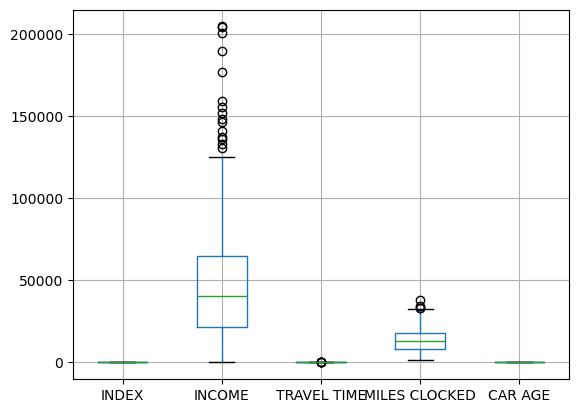

In [131]:
df.boxplot()
plt.show()

In [132]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    return (lower_range,upper_range)

In [133]:
remove_outlier(df['INCOME'])

(-42420.96970500001, 129078.286015)

In [134]:
lr_income,ur_income=remove_outlier(df['INCOME'])
df['INCOME'] = np.where(df['INCOME']>ur_income,ur_income,df['INCOME'])
df['INCOME'] = np.where(df['INCOME']<lr_income,lr_income,df['INCOME'])

lr_travel,ur_travel=remove_outlier(df['TRAVEL TIME'])
df['TRAVEL TIME'] = np.where(df['TRAVEL TIME']>ur_travel,ur_travel,df['TRAVEL TIME'])
df['TRAVEL TIME'] = np.where(df['TRAVEL TIME']<lr_travel,lr_travel,df['TRAVEL TIME'])

lr_miles,ur_miles=remove_outlier(df['MILES CLOCKED'])
df['MILES CLOCKED'] = np.where(df['MILES CLOCKED']>ur_miles,ur_miles,df['MILES CLOCKED'])
df['MILES CLOCKED']= np.where(df['MILES CLOCKED']<lr_miles,lr_miles,df['MILES CLOCKED'])

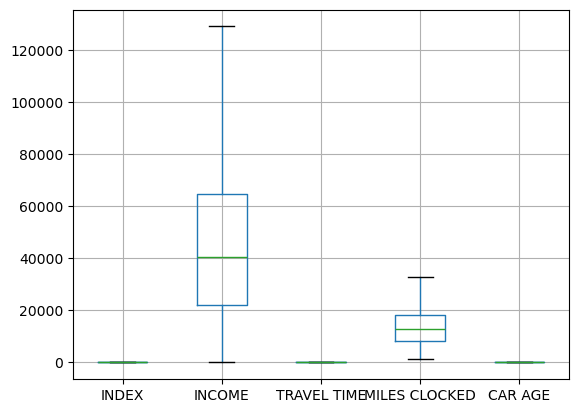

In [135]:
df.boxplot()
plt.show()

# MACHINE LEARNING

In [137]:
df.drop('POSTAL CODE',axis=1,inplace=True)

In [237]:
df.drop('INDEX',axis=1,inplace=True)

KeyError: "['INDEX'] not found in axis"

In [217]:
df.head()

,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY
0,125301.242500,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7.0,Texas
1,50815.445310,No,M,High School,Blue Collar,20.591628,Private,18930.0,Minivan,1.0,Texas
2,62977.824160,No,F,Bachelors,Clerical,33.639949,Private,12845.0,SUV,1.0,Texas
3,77099.966240,No,F,Masters,Lawyer,15.415676,Private,18300.0,Sports Car,11.0,Texas
4,129078.286015,No,M,High School,Blue Collar,34.426446,Commercial,28340.0,Panel Truck,10.0,Texas


In [219]:
# Standard Scaler
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

In [221]:
std_df=df.copy()

In [223]:
std_df.head()

,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY
0,125301.242500,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7.0,Texas
1,50815.445310,No,M,High School,Blue Collar,20.591628,Private,18930.0,Minivan,1.0,Texas
2,62977.824160,No,F,Bachelors,Clerical,33.639949,Private,12845.0,SUV,1.0,Texas
3,77099.966240,No,F,Masters,Lawyer,15.415676,Private,18300.0,Sports Car,11.0,Texas
4,129078.286015,No,M,High School,Blue Collar,34.426446,Commercial,28340.0,Panel Truck,10.0,Texas


In [225]:
std_scl = StandardScaler()

In [227]:
std_df['INCOME'] = std_scl.fit_transform(std_df[['INCOME']])

In [229]:
std_df.head()

,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY
0,2.293947,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7.0,Texas
1,0.117663,No,M,High School,Blue Collar,20.591628,Private,18930.0,Minivan,1.0,Texas
2,0.473017,No,F,Bachelors,Clerical,33.639949,Private,12845.0,SUV,1.0,Texas
3,0.885629,No,F,Masters,Lawyer,15.415676,Private,18300.0,Sports Car,11.0,Texas
4,2.404302,No,M,High School,Blue Collar,34.426446,Commercial,28340.0,Panel Truck,10.0,Texas


In [231]:
std_df['TRAVEL TIME'] = std_scl.fit_transform(std_df[['TRAVEL TIME']])
std_df['MILES CLOCKED'] = std_scl.fit_transform(std_df[['MILES CLOCKED']])
std_df['CAR AGE'] = std_scl.fit_transform(std_df[['CAR AGE']])

In [233]:
std_df.head()

,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY
0,2.293947,No,F,Bachelors,Blue Collar,0.832200,Commercial,0.535034,Sports Car,0.137267,Texas
1,0.117663,No,M,High School,Blue Collar,-0.991124,Private,0.754768,Minivan,-1.052842,Texas
2,0.473017,No,F,Bachelors,Clerical,-0.043693,Private,-0.136620,SUV,-1.052842,Texas
3,0.885629,No,F,Masters,Lawyer,-1.366947,Private,0.662480,Sports Car,0.930674,Texas
4,2.404302,No,M,High School,Blue Collar,0.013415,Commercial,2.133234,Panel Truck,0.732322,Texas


In [147]:
from sklearn.preprocessing import MinMaxScaler

In [241]:
min_max_df=df.copy()

In [243]:
Min_Max_Scl = MinMaxScaler()

In [245]:
min_max_df['INCOME'] = Min_Max_Scl.fit_transform(min_max_df[['INCOME']])

In [247]:
min_max_df.head()

,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY
0,0.970738,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7.0,Texas
1,0.393679,No,M,High School,Blue Collar,20.591628,Private,18930.0,Minivan,1.0,Texas
2,0.487904,No,F,Bachelors,Clerical,33.639949,Private,12845.0,SUV,1.0,Texas
3,0.597312,No,F,Masters,Lawyer,15.415676,Private,18300.0,Sports Car,11.0,Texas
4,1.000000,No,M,High School,Blue Collar,34.426446,Commercial,28340.0,Panel Truck,10.0,Texas


In [249]:
min_max_df['TRAVEL TIME'] = Min_Max_Scl.fit_transform(min_max_df[['TRAVEL TIME']])
min_max_df['MILES CLOCKED'] = Min_Max_Scl.fit_transform(min_max_df[['MILES CLOCKED']])
min_max_df['CAR AGE'] = Min_Max_Scl.fit_transform(min_max_df[['CAR AGE']])

In [251]:
min_max_df.head()

,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY
0,0.970738,No,F,Bachelors,Blue Collar,0.649445,Commercial,0.507083,Sports Car,0.315789,Texas
1,0.393679,No,M,High School,Blue Collar,0.248775,Private,0.554830,Minivan,0.000000,Texas
2,0.487904,No,F,Bachelors,Clerical,0.456970,Private,0.361133,SUV,0.000000,Texas
3,0.597312,No,F,Masters,Lawyer,0.166189,Private,0.534776,Sports Car,0.526316,Texas
4,1.000000,No,M,High School,Blue Collar,0.469519,Commercial,0.854369,Panel Truck,0.473684,Texas


In [154]:
from sklearn.preprocessing import RobustScaler

### Encoding - Converting Category to Number

##### LABEL ENCODER

In [256]:
LE_df = df.copy()

In [258]:
pd.Categorical(LE_df['EDUCATION']).unique()

['Bachelors', 'High School', 'Masters', 'PhD']
Categories (4, object): ['Bachelors', 'High School', 'Masters', 'PhD']

In [260]:
pd.Categorical(LE_df['EDUCATION']).unique().codes

array([0, 1, 2, 3], dtype=int8)

In [262]:
for feature in LE_df.columns:
    if LE_df[feature].dtype=='object':
        LE_df[feature] = pd.Categorical(LE_df[feature]).codes

In [264]:
LE_df.head()

,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY
0,125301.242500,0,0,0,0,45.703013,0,17430.0,4,7.0,9
1,50815.445310,0,1,1,0,20.591628,1,18930.0,0,1.0,9
2,62977.824160,0,0,0,1,33.639949,1,12845.0,3,1.0,9
3,77099.966240,0,0,2,4,15.415676,1,18300.0,4,11.0,9
4,129078.286015,0,1,1,0,34.426446,0,28340.0,1,10.0,9


In [266]:
from sklearn.preprocessing import LabelEncoder

In [268]:
df_le = df.copy()

In [270]:
LE = LabelEncoder()

In [272]:
for feature in df_le.columns:
    if df_le[feature].dtype=='object':
        df_le[feature] = LE.fit_transform(df_le[feature])

In [274]:
df_le.head()

,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY
0,125301.242500,0,0,0,0,45.703013,0,17430.0,4,7.0,9
1,50815.445310,0,1,1,0,20.591628,1,18930.0,0,1.0,9
2,62977.824160,0,0,0,1,33.639949,1,12845.0,3,1.0,9
3,77099.966240,0,0,2,4,15.415676,1,18300.0,4,11.0,9
4,129078.286015,0,1,1,0,34.426446,0,28340.0,1,10.0,9


##### ONE HOT ENCODING

In [288]:
df_ohe = df.copy()

In [292]:
pd.get_dummies(df_ohe,drop_first=True,dtype=int)

,INCOME,TRAVEL TIME,MILES CLOCKED,CAR AGE,MARITAL STATUS_Yes,SEX_M,EDUCATION_High School,EDUCATION_Masters,EDUCATION_PhD,JOB_Clerical,...,CITY_Houston,CITY_Las Vegas,CITY_Los Angeles,CITY_New Albany,CITY_New York City,CITY_Philadelphia,CITY_San Francisco,CITY_Seattle,CITY_Texas,CITY_Washington
0,125301.242500,45.703013,17430.0,7.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,50815.445310,20.591628,18930.0,1.0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,62977.824160,33.639949,12845.0,1.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,77099.966240,15.415676,18300.0,11.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,129078.286015,34.426446,28340.0,10.0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,15251.524730,31.315058,3030.0,1.0,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
299,18408.395450,42.619118,7440.0,1.0,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
300,40592.300885,36.533624,7660.0,6.0,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
301,40592.300885,60.884292,19550.0,1.0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
